# HOUSE PRICE PREDICTION PROJECT

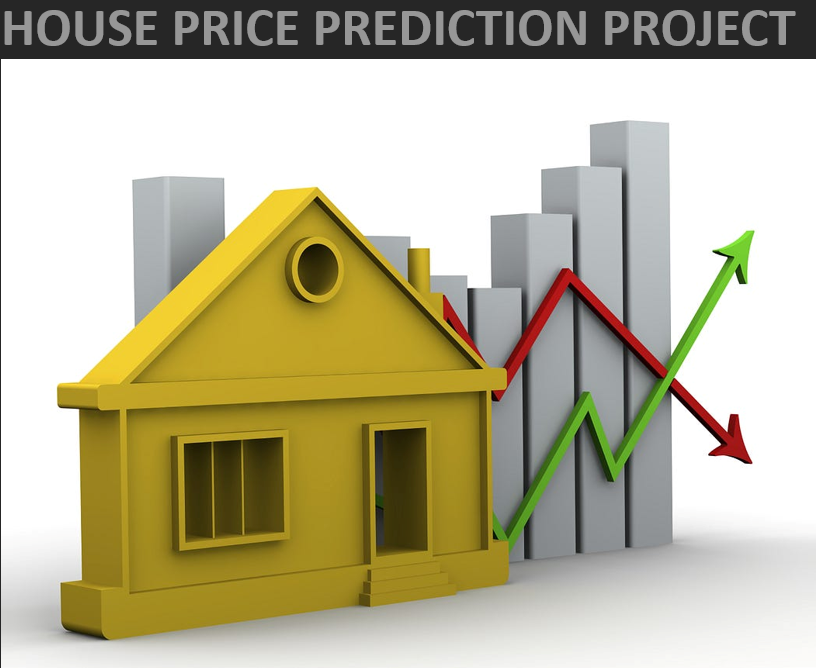

**INTRODUCTION ABOUT THE PROJECT**

Welcome to the House Price Prediction Challenge, you will test your regression skills by designing an algorithm to accurately predict the house prices in India. Accurately predicting house prices can be a daunting task. The buyers are just not concerned about the size(square feet) of the house and there are various other factors that play a key role to decide the price of a house/property. It can be extremely difficult to figure out the right set of attributes that are contributing to understanding the buyer's behavior as such. This dataset has been collected across various property aggregators across India. In this competition, provided the 12 influencing factors your role as a data scientist is to predict the prices as accurately as possible.

Also, in this competition, you will get a lot of room for feature engineering and mastering advanced regression techniques such as Random Forest, Deep Neural Nets, and various other ensembling techniques.

**IMPORTING ALL LIBRARIES**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

**LOADING THE DATA**

In [4]:
csv_url1 = r"C:\Users\ASHUTOSH YADAV\OneDrive\Desktop\DATASET\msc_training_dataset.csv"
csv_url2 = r"C:\Users\ASHUTOSH YADAV\OneDrive\Desktop\DATASET\msc_testing_dataset.csv"

train = pd.read_csv(csv_url1)
test = pd.read_csv(csv_url2)

In [ ]:
train

In [ ]:
test

In [ ]:
train.head()

In [ ]:
train.shape

In [ ]:
train.columns

In [ ]:
# check null value from each column
train.info()

In [ ]:
# check the data type of column
train.dtypes

In [ ]:
# check the uniqueness of data
train.nunique()

In [ ]:
# checking the duplicate values in column
train.duplicated().sum()

In [ ]:
# how to delete duplicate rows from table
train.drop_duplicates(inplace=True)

In [ ]:
train.duplicated().sum()

In [ ]:
train.shape

In [ ]:
# show complete info of data set
train.info()

In [ ]:
# describe the data, describe the statistics, five-number summary
train.describe()

In [ ]:
train.head()

In [ ]:
train.sample(2)

In [ ]:
pie = train.groupby('bathroom')['price'].mean().reset_index()
pie

# EDA (Exploratory Data Analysis)

In [ ]:
sns.set_style('dark')

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(data=train,x='room',y='price',palette='rainbow')
plt.title('AVERAGE PRICE BY ROOM',fontweight='bold')

plt.subplot(1,2,2)
plt.pie(pie['price'],labels=pie['bathroom'],autopct="%0.2f%%")
plt.title('AVERAGE PRICE BY BATHROOM')

plt.show()

**INSIGHTS:** 
1. with the help of the column chart we can see the average maximum price of a house dependency on number of rooms
2. 

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=train,x='price',kde=1,color='red')
plt.title('Check The Frequency Of Price',fontweight='bold')
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=train,x='price',kde=1,hue='kitchen',color='viridis')
plt.title('Check The Frequency Of Price',fontweight='bold')
plt.show()

In [ ]:
train.head()

In [ ]:
train.nunique().reset_index().T

In [ ]:
plt.figure(figsize=(36,27))
c = 1
for i in train:
    if i in ('bathroom','kitchen','price'):
        continue
    else:
        plt.subplot(3,3,c)
        sns.histplot(data=train,x='price',hue=i,kde=1)
        plt.title(f'Frequnecy of Price By {i}',fontweight='bold')
        c += 1
plt.show()

In [ ]:
train.shape

In [ ]:
train.head(3)

In [ ]:
for i in train:
    if i == 'price':
        continue
    else:
        print('-'*40)
        val =  train[i].value_counts().reset_index()
        print(val)
        print('-'*40)

In [ ]:
train.head()

In [ ]:
train.corr()

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(train.corr(),annot=True)
plt.show()

# linear regression

In [ ]:
train.head()

In [ ]:
x_train = train.drop(columns = 'price')
y_train = train[['price']]

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
x_train.head()

In [ ]:
y_train.head()

In [ ]:
test.head()

In [ ]:
x_test =  test.drop(columns = 'price')
y_test = test[['price']]

In [ ]:
x_test.head()

In [ ]:
y_test.head()

# BUILDING THE MACHINE LEARNING ALGORITHMS

In [ ]:
linear = LinearRegression()
linear.fit(x_train,y_train)

In [ ]:
ac = linear.score(x_train,y_train)
print(f'Accuracy Of Training Dataset : {ac}')

In [ ]:
ac2 = linear.score(x_test,y_test)
print(f'Accuracy Of Testing Dataset : {ac2}')

In [ ]:
pred = linear.predict(x_test)
pred.T